In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets,models,layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train_full,y_train_full),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train_full.shape,y_train_full.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

truck


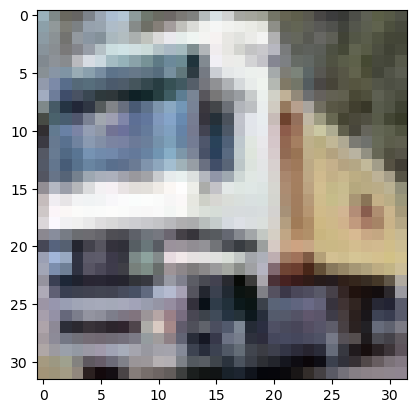

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.imshow(x_train_full[1])
print(class_names[(y_train_full[1][0])])



In [6]:
x_train_full=x_train_full/255
x_test=x_test/255

In [7]:
x_valid=x_train_full[0:5000]
x_train=x_train_full[5000:]



In [8]:
y_valid=y_train_full[0:5000]
y_train=y_train_full[5000:]

In [9]:
x_valid.shape,y_valid.shape,x_train.shape,y_train.shape

((5000, 32, 32, 3), (5000, 1), (45000, 32, 32, 3), (45000, 1))

# Model Architechture

In [13]:
model=models.Sequential()

In [14]:
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,954 (480.29 KB)

 Trainable params: 122,762 (479.54 KB)

 Non-trainable params: 192 (768.00 B)

# compile

In [17]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model

# Train

In [18]:
history=model.fit(x_train,y_train,batch_size=30,epochs=21,validation_data=(x_valid,y_valid))

Epoch 1/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1011 - loss: 2.6609 - val_accuracy: 0.0902 - val_loss: 2.3026
Epoch 2/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.0955 - loss: 2.3026 - val_accuracy: 0.0914 - val_loss: 2.3026
Epoch 3/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0946 - loss: 2.3026 - val_accuracy: 0.0904 - val_loss: 2.3026
Epoch 4/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.0961 - loss: 2.3026 - val_accuracy: 0.0916 - val_loss: 2.3026
Epoch 5/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.1097 - loss: 2.3033 - val_accuracy: 0.1130 - val_loss: 2.3026
Epoch 6/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.1139 - loss: 2.3026 - val_accuracy: 0.1130 - val_loss: 2.3026
Epoch 7/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.1148 - loss: 2.3026 - val_accuracy: 0.1126 - val_loss: 2.3026
Epoch 8/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.1147 -

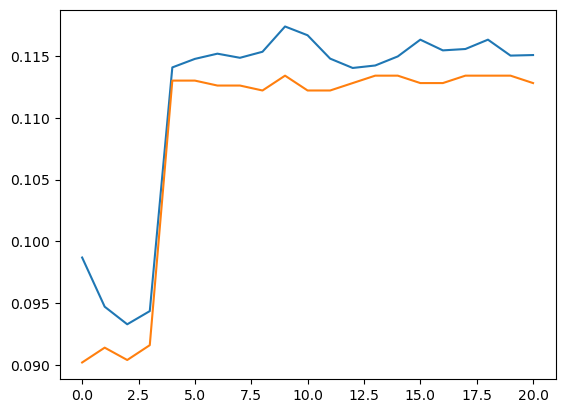

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [23]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
test_acc

313/313 - 2s - 6ms/step - accuracy: 0.1189 - loss: 2.3026


0.11890000104904175